In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import cv2

In [3]:
#function to resize images in dataset
#beacuse we are using RGB images i use opencv package.
def resize_image(src_image, dst_image_height, dst_image_width):
    src_image_height = src_image.shape[0]
    src_image_width = src_image.shape[1]
    height_scale = dst_image_height / src_image_height
    width_scale = dst_image_width / src_image_width
    img = cv2.resize(src=src_image, dsize=(0, 0), fx=width_scale, fy=height_scale, interpolation=cv2.INTER_CUBIC)
    return img

In [4]:
def confusion_matrix(model_name,X_test,y_test):
  from sklearn import metrics
  # actual = y_test
  target_names = ["black","grizzly","panda","polar", "teddy"]
  new_y_vlaues=np.argmax(y_test, axis=1) #conver from encoding
  predicted =np.argmax(model_name.predict(X_test) , axis=-1)
  confusion_matrix = metrics.confusion_matrix(new_y_vlaues, predicted)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = target_names)
  cm_display.plot()
  plt.show()

In [5]:
from sklearn.metrics import classification_report
#get clasification report
def CR(model_name,X_test,Y_test):
  target_names = ["black","grizzly","panda","polar", "teddy"]
  new_y_vlaues=np.argmax(Y_test, axis=1) #conver from encoding
  predicted_value =np.argmax(model_name.predict(X_test) , axis=-1)
  print(classification_report(new_y_vlaues, predicted_value, target_names=target_names))
  # return classification_report

In [6]:
def wanted_results(model_name,X_test,Y_test):
  CR(model_name,X_test,Y_test)
  confusion_matrix(model_name,X_test,Y_test)

In [7]:
#read_all dataset

In [8]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#reading all images and labels
import glob
import matplotlib.image as img
images=[]
labels=[]
images_path=glob.glob("/content/drive/MyDrive/dataset-bears/data/black/*.*")
for path in images_path:
  img=cv2.imread(path)
  images.append(img)
  label=0  #"black"
  labels.append(label)
images_path=glob.glob("/content/drive/MyDrive/dataset-bears/data/grizzly/*.*")
for path in images_path:
  img=cv2.imread(path)
  images.append(img)
  label=1 #"grizzly"
  labels.append(label)
images_path=glob.glob("/content/drive/MyDrive/dataset-bears/data/panda/*.*")
for path in images_path:
  img=cv2.imread(path)
  images.append(img)
  label=2 #"panda"
  labels.append(label)
images_path=glob.glob("/content/drive/MyDrive/dataset-bears/data/polar/*.*")
for path in images_path:
  img=cv2.imread(path)
  images.append(img)
  label=3 #"polar"
  labels.append(label)

images_path=glob.glob("/content/drive/MyDrive/dataset-bears/data/teddy/*.*")

for path in images_path:
  img=cv2.imread(path)
  images.append(img)
  label=4 #"teddy"
  labels.append(label)



In [10]:
print(len(labels))

263


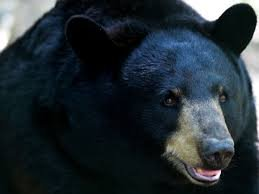

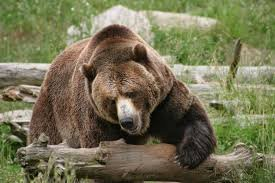

In [11]:
#show some images
# cv2.imshow(images[2])
from google.colab.patches import cv2_imshow
cv2_imshow(images[2])
cv2_imshow(images[93])
# images[2].shape

In [12]:
X=[]
Y=[]
i=0
for image in images:
  resized_img=resize_image(image,28,28)
  gray_scale=cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
  X.append(gray_scale)
  Y.append(labels[i])
  i+=1

In [13]:
#test if resize function work fine
cv2_imshow(X[2])
cv2_imshow(X[93])

In [14]:
print(type(X))
print(type(Y))

<class 'list'>
<class 'list'>


In [15]:
#normalizing data
X=np.array(X)
Y=np.array(Y)
X=X/255
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [17]:
X_train.shape

(197, 28, 28)

In [18]:
Y_train.shape

(197,)

In [19]:
n_classes = 5
Y_train = to_categorical(Y_train, n_classes)
Y_test = to_categorical(Y_test, n_classes)

In [20]:
#now the preprocessing is over its time to build our models

In [21]:
#LeNet

In [22]:
def model_LeNet():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(n_classes, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [23]:
model_1=model_LeNet()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [24]:
model_1.fit(X_train, Y_train, batch_size=8, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
25/25 [==============================] - 3s 18ms/step - loss: 1.6053 - accuracy: 0.2995 - val_loss: 1.4866 - val_accuracy: 0.3030
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 1.3095 - accuracy: 0.4365 - val_loss: 1.1474 - val_accuracy: 0.4697
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 1.1671 - accuracy: 0.4569 - val_loss: 1.1177 - val_accuracy: 0.4545
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 1.0490 - accuracy: 0.5381 - val_loss: 1.1446 - val_accuracy: 0.4697
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9673 - accuracy: 0.6041 - val_loss: 1.0874 - val_accuracy: 0.4697
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 0.8750 - accuracy: 0.6650 - val_loss: 1.0782 - val_accuracy: 0.5909
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.7411 - accuracy: 0.6954 - val_loss: 1.1668 - val_accuracy: 0.5152
Epoch 8/10
25/25 [=

In [25]:
print(len(X_test))

66


3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       black       0.78      0.58      0.67        12
     grizzly       0.29      0.46      0.35        13
       panda       0.75      0.25      0.38        12
       polar       0.59      0.81      0.68        16
       teddy       0.60      0.46      0.52        13

    accuracy                           0.53        66
   macro avg       0.60      0.51      0.52        66
weighted avg       0.60      0.53      0.53        66

3/3 [==============================] - 0s 5ms/step


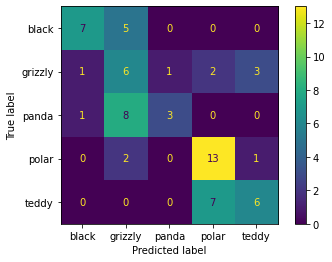

In [26]:
wanted_results(model_1,X_test,Y_test)

In [27]:
17+9+14+12+14
35/66

66

In [28]:
def model_AlexNet():
  model = Sequential()

  model.add(Conv2D(96, kernel_size=(11, 11), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
  model.add(BatchNormalization())

  model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
  model.add(BatchNormalization())

  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1)))
  model.add(BatchNormalization())

  model.add(Flatten())
  model.add(Dense(4096, activation='tanh'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='tanh'))
  model.add(Dropout(0.5))


  model.add(Dense(5, activation='softmax'))
  #compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  #return the output of function
  return model

In [29]:
model_2=model_AlexNet()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 18, 18, 96)        11712     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                      

In [30]:
model_2.fit(X_train, Y_train, batch_size=8, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
25/25 [==============================] - 3s 45ms/step - loss: 8.8641 - accuracy: 0.2843 - val_loss: 5.6905 - val_accuracy: 0.0303
Epoch 2/10
25/25 [==============================] - 0s 16ms/step - loss: 2.8606 - accuracy: 0.4112 - val_loss: 4.9950 - val_accuracy: 0.2576
Epoch 3/10
25/25 [==============================] - 0s 15ms/step - loss: 3.2094 - accuracy: 0.3706 - val_loss: 3.6300 - val_accuracy: 0.2424
Epoch 4/10
25/25 [==============================] - 0s 15ms/step - loss: 2.8149 - accuracy: 0.3503 - val_loss: 2.0697 - val_accuracy: 0.4697
Epoch 5/10
25/25 [==============================] - 0s 16ms/step - loss: 2.6784 - accuracy: 0.4162 - val_loss: 4.3934 - val_accuracy: 0.2576
Epoch 6/10
25/25 [==============================] - 0s 16ms/step - loss: 2.3103 - accuracy: 0.3503 - val_loss: 2.0375 - val_accuracy: 0.3333
Epoch 7/10
25/25 [==============================] - 0s 16ms/step - loss: 2.2885 - accuracy: 0.3909 - val_loss: 2.1687 - val_accuracy: 0.3182
Epoch 8/10
25

3/3 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

       black       0.00      0.00      0.00        12
     grizzly       0.25      0.38      0.30        13
       panda       0.33      0.08      0.13        12
       polar       0.00      0.00      0.00        16
       teddy       0.32      1.00      0.48        13

    accuracy                           0.29        66
   macro avg       0.18      0.29      0.18        66
weighted avg       0.17      0.29      0.18        66

3/3 [==============================] - 0s 5ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


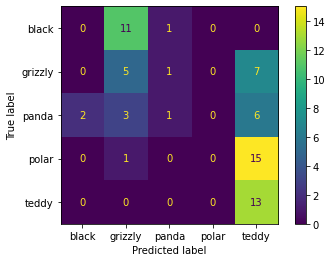

In [31]:
wanted_results(model_2,X_test,Y_test)

In [32]:
type(images)

list

In [33]:
import imutils
images_new=[]
labels_new=[] 
def image_agumentation(images,labels,angles):
  for i in range(len(images)):
    image = images[i]
    label_of_rotated_img=labels[i]
    images_new.append(image)
    labels_new.append(label_of_rotated_img)
    for angle_of_rotation in angles:
      Rotated_image = imutils.rotate(image, angle=angle_of_rotation)
      images_new.append(Rotated_image)
      labels_new.append(label_of_rotated_img)
  return images_new, labels_new

In [60]:
angles=[20]
images_new, labels_new=image_agumentation(images,labels,angles)

In [61]:
X_new=[]
Y_new=[]
i=0
for image in images_new:
  resized_img=resize_image(image,28,28)
  gray_scale=cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)
  X_new.append(gray_scale)
  Y_new.append(labels_new[i])

In [62]:
X_new=np.array(X_new)
Y_new=np.array(Y_new)
X_new=X_new/255

In [63]:
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.15)

In [64]:
n_classes = 5
Y_train_new = to_categorical(Y_train_new, n_classes)
Y_test_new= to_categorical(Y_test_new, n_classes)

In [65]:
model_1_new=model_LeNet()
model_1_new.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_22 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 9216)              0         
                                                                 
 dense_15 (Dense)            (None, 128)               1179776   
                                                      

In [66]:
model_1_new.fit(X_train_new, Y_train_new, batch_size=128, epochs=5, verbose=1, validation_data=(X_test_new, Y_test_new))

Epoch 1/5
23/23 [==============================] - 1s 25ms/step - loss: 0.0982 - accuracy: 0.9697 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
23/23 [==============================] - 0s 10ms/step - loss: 8.2044e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 0s 10ms/step - loss: 4.1022e-11 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [67]:
# wanted_results(model_1_new,X_test_new,Y_test_new)
Y_train_new.shape

(2906, 5)

In [57]:
model_2_new=model_AlexNet()
model_2_new.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 18, 18, 96)        11712     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 16, 16, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 256)       614656    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 10, 10, 256)      0         
 g2D)                                                            
                                                      

In [59]:
model_2_new.fit(X_train_new, Y_train_new, batch_size=8, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
308/308 [==============================] - 5s 15ms/step - loss: 2.0366e-05 - accuracy: 1.0000 - val_loss: 1.9442e-06 - val_accuracy: 1.0000
Epoch 2/10
308/308 [==============================] - 4s 14ms/step - loss: 1.3659e-05 - accuracy: 1.0000 - val_loss: 1.4113e-06 - val_accuracy: 1.0000
Epoch 3/10
308/308 [==============================] - 4s 14ms/step - loss: 1.4139e-05 - accuracy: 1.0000 - val_loss: 1.1182e-06 - val_accuracy: 1.0000
Epoch 4/10
308/308 [==============================] - 4s 15ms/step - loss: 7.7190e-06 - accuracy: 1.0000 - val_loss: 8.5726e-07 - val_accuracy: 1.0000
Epoch 5/10
308/308 [==============================] - 4s 14ms/step - loss: 6.0194e-06 - accuracy: 1.0000 - val_loss: 6.8394e-07 - val_accuracy: 1.0000
Epoch 6/10
308/308 [==============================] - 4s 14ms/step - loss: 4.3381e-06 - accuracy: 1.0000 - val_loss: 5.3727e-07 - val_accuracy: 1.0000
Epoch 7/10
308/308 [==============================] - 4s 14ms/step - loss: 3.8537e-06 - accura

In [1]:
print("test")

test
